# EACOP Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import os
import bertopic

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%%html
<style type="text/css">
@import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
</style>

In [13]:
import sys
sys.path.append("../")

import climatewatch

In [14]:
from climatewatch.twitter import TweetsDataset,process_json_files

# Data preparation

In [15]:
folder = "../data/EACOP"
json_files = [x for x in os.listdir(folder) if x.endswith(".json")]
json_files

['EACOP_stopeacop1.json',
 'EACOP_stopeacop2.json',
 'EACOP_supporteacop.json',
 'EACOP_total.json']

In [21]:
# data = process_json_files([json_files[0]],folder,vader = False,encoding = "utf8")
data = process_json_files(json_files,folder,vader = False,encoding = "utf8")
print(data.shape)

(54492, 36)


In [22]:
data.head()

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   
2  snscrape.modules.twitter.Tweet   
3  snscrape.modules.twitter.Tweet   
4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/Rosove/status/154228039953...   
1  https://twitter.com/wildfireliz/status/1542279...   
2  https://twitter.com/Insure_Future/status/15422...   
3  https://twitter.com/FatimaFlash/status/1542237...   
4  https://twitter.com/lindsaymeim14/status/15422...   

                       date  \
0 2022-06-29 22:54:36+00:00   
1 2022-06-29 22:49:06+00:00   
2 2022-06-29 21:55:22+00:00   
3 2022-06-29 20:03:29+00:00   
4 2022-06-29 19:11:08+00:00   

                                             content  \
0  I just sent a message to @MarshGlobal calling ...   
1  I stand in #soldarity  with local #communities...   
2  We stand in solidarity with local communities ...   
3  I just sent a message to @MarshGlobal calling ...   
4  even Penny knows...\n\nin 2022, there's no mor...   

                                     renderedContent                   id  \
0  I just sent a message to @MarshGlobal calling ...  1542280399535104000   
1  I stand in #soldarity  with local #communities...  1542279016798818304   
2  We stand in solidarity with local communities ...  1542265496501878784   
3  I just sent a message to @MarshGlobal calling ...  1542237337140199424   
4  even Penny knows...\n\nin 2022, there's no mor...  1542224164798566404   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           2   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           1   

   retweetCount  likeCount  quoteCount       conversationId lang  \
0             1          0           0  1542280399535104000   en   
1             0          1           0  1542279016798818304   en   
2            16         33           0  1542265496501878784   en   
3             0          0           0  1542237337140199424   en   
4             4         11           0  1542224164798566404   en   

                                            outlinks  \
0  [https://nwmd.io/s/twitter/ZxY-BzHEHPPqQ26lLrM...   
1                                               None   
2                                               None   
3  [https://nwmd.io/s/twitter/ZxY-BzHEHPPqQ2yrLrU...   
4                                               None   

                 tcooutlinks  \
0  [https://t.co/ph90smbl7T]   
1                       None   
2                       None   
3  [https://t.co/OwEPHAKNyA]   
4                       None   

                                               media retweetedTweet  \
0                                               None           None   
1  [{'_type': 'snscrape.modules.twitter.Photo', '...           None   
2  [{'_type': 'snscrape.modules.twitter.Photo', '...           None   
3                                               None           None   
4  [{'_type': 'snscrape.modules.twitter.Photo', '...           None   

  quotedTweet  inReplyToTweetId inReplyToUser  \
0        None               NaN          None   
1        None               NaN          None   
2        None               NaN          None   
3        None               NaN          None   
4        None               NaN          None   

                                      mentionedUsers coordinates place  \
0  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
1  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
2  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
3  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
4  [{'_type': 'snscrape.modules.twitter.U

In [23]:
data.to_pickle("../data/EACOP/full_data_TOTAL.pkl")

# Loading data

In [24]:
PATH = "../data/EACOP/full_data_TOTAL.pkl" 

tweets = TweetsDataset(pkl_path = PATH)
tweets.data.shape

def find_hashtags(x,l):
    if isinstance(l,list):
        return x in [y.upper() for y in l]
    else:
        return False
    
# tweets.data["is_STOPTOTAL"] = tweets.data["hashtags"].map(lambda y : find_hashtags("STOPTOTAL",y))
# tweets.data = tweets.data.query("is_STOPTOTAL or is_EACOP")
tweets.data.shape

(54492, 36)

# Basic exploration

## Au cours du temps

In [25]:
tweets.show_evolution(period = "1W")

## Premiers tweets

In [27]:
tweets.show(5,embed = False)

>> From PalomaMoritz - Likes 9359 - Date 2022-05-23 16:01:34+00:00
Je n'ai pas l'habitude de faire ça mais @TotalEnergies  s'est attaqué à moi personnellement en essayant de décrédibiliser publiquement mon travail de journaliste, quitte à manipuler les informations et faire du greenwashing. Voici donc ma réponse. Thread (1/15) https://t.co/JGf6pz14FQ

------------------------------------------
>> From greenpeacefr - Likes 7820 - Date 2022-05-25 11:23:29+00:00
"Crève et fais pas chier"

C'est comme ça que certains actionnaires de @TotalEnergies se sont adressés aux activistes du mouvement climat qui protestaient contre le modèle destructeur déployé par la multinationale. Soutien à elles et eux 💚 #BlocageTotal https://t.co/EDunbeQ863

------------------------------------------
>> From gautam_adani - Likes 6639 - Date 2022-06-14 05:09:59+00:00
In our journey to be the world's largest Green H2 player, the partnership with @TotalEnergies will fundamentally shape market demand. Our ability t

## Split par langue

In [28]:
tweets.show_lang()

## Top hashtags

In [29]:
tweets.show_hashtags()

## Utilisateurs les plus likés

In [30]:
tweets.show_most_liked_users(by = "lang",height = 300)

In [31]:
tweets.show_most_liked_users(variable = "reach",by = "lang",height = 300)

In [32]:
tweets.show_most_liked_users(variable = "retweetCount",by = "lang",height = 300)

## Tweets WordCloud

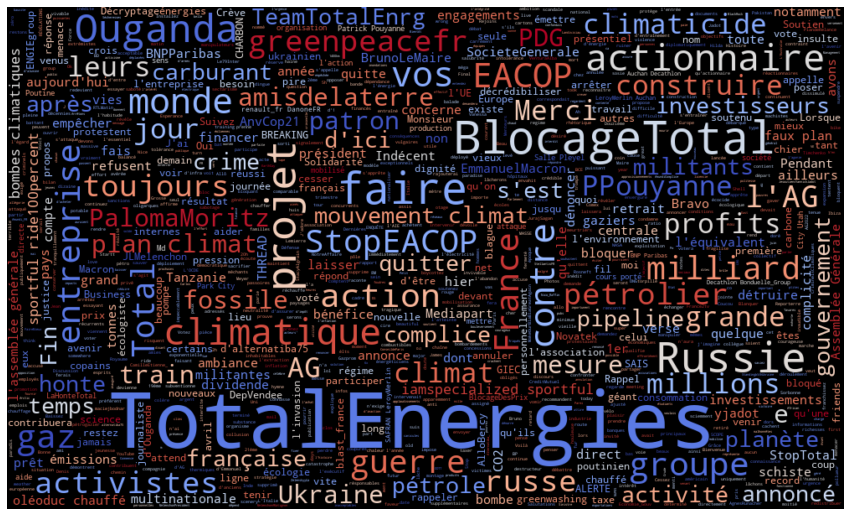

In [21]:
(tweets
 .query("lang=='fr'")
 .query_most_liked(100)
 .show_wordcloud(show = True)
)

# Topic modeling

In [27]:
tweets_topic = (tweets
     .query("lang=='en'")
     .query("likeCount > 5")
     .data
     .dropna(subset = ["clean_text"])
     .drop_duplicates(subset = ["clean_text"])
)

tweets_topic = TweetsDataset(data = tweets_topic)
tweets_topic.data.shape

(1902, 34)

In [29]:
tweets_topic.fit_topic_modeling(min_topic_size = 5)

... Create vectorizer model
... Create BERTopic model
... Fit BERTopic model


Batches:   0%|          | 0/60 [00:00<?, ?it/s]

2022-06-26 19:42:09,964 - BERTopic - Transformed documents to Embeddings
2022-06-26 19:42:23,450 - BERTopic - Reduced dimensionality with UMAP
2022-06-26 19:42:23,607 - BERTopic - Clustered UMAP embeddings with HDBSCAN
2022-06-26 19:42:27,164 - BERTopic - Reduced number of topics from 85 to 66


In [31]:
tweets_topic.topic_summary

Topic  Count                                               Name
0      -1    439             -1_totalenergies_oil_stopeacop_climate
1       0    155             0_eacop_stopeacop_uganda_totalenergies
2       1     95                      1_russia_russian_ukraine_ties
3       2     79              2_african_corruption_football_justice
4       3     68      3_chevron_myanmar_junta_totalenergies chevron
..    ...    ...                                                ...
61     60      6              60_ampersandmotor1_kenya_motor_spares
62     61      6  61_totalenergies follow live_bangkok2022_thoma...
63     62      6    62_drink oil_drink_fridays4future_climatestrike
64     63      5  63_stem_shetland_young people attending_indust...
65     64      5  64_brent_million low_pushing projects like_oil...

[66 rows x 3 columns]

In [32]:
tweets_topic.topic_model.visualize_topics()

In [33]:
tweets_topic.topic_model.visualize_barchart()

In [34]:
tweets_topic.topic_model.visualize_hierarchy(top_n_topics=30,orientation = "left",width = 1000)

# Analyse des réseaux 

In [33]:
G = (tweets
     .query("lang=='fr'")
     .query_most_liked(1000)
     .make_network()
)

len(G.nodes)

0it [00:00, ?it/s]

248

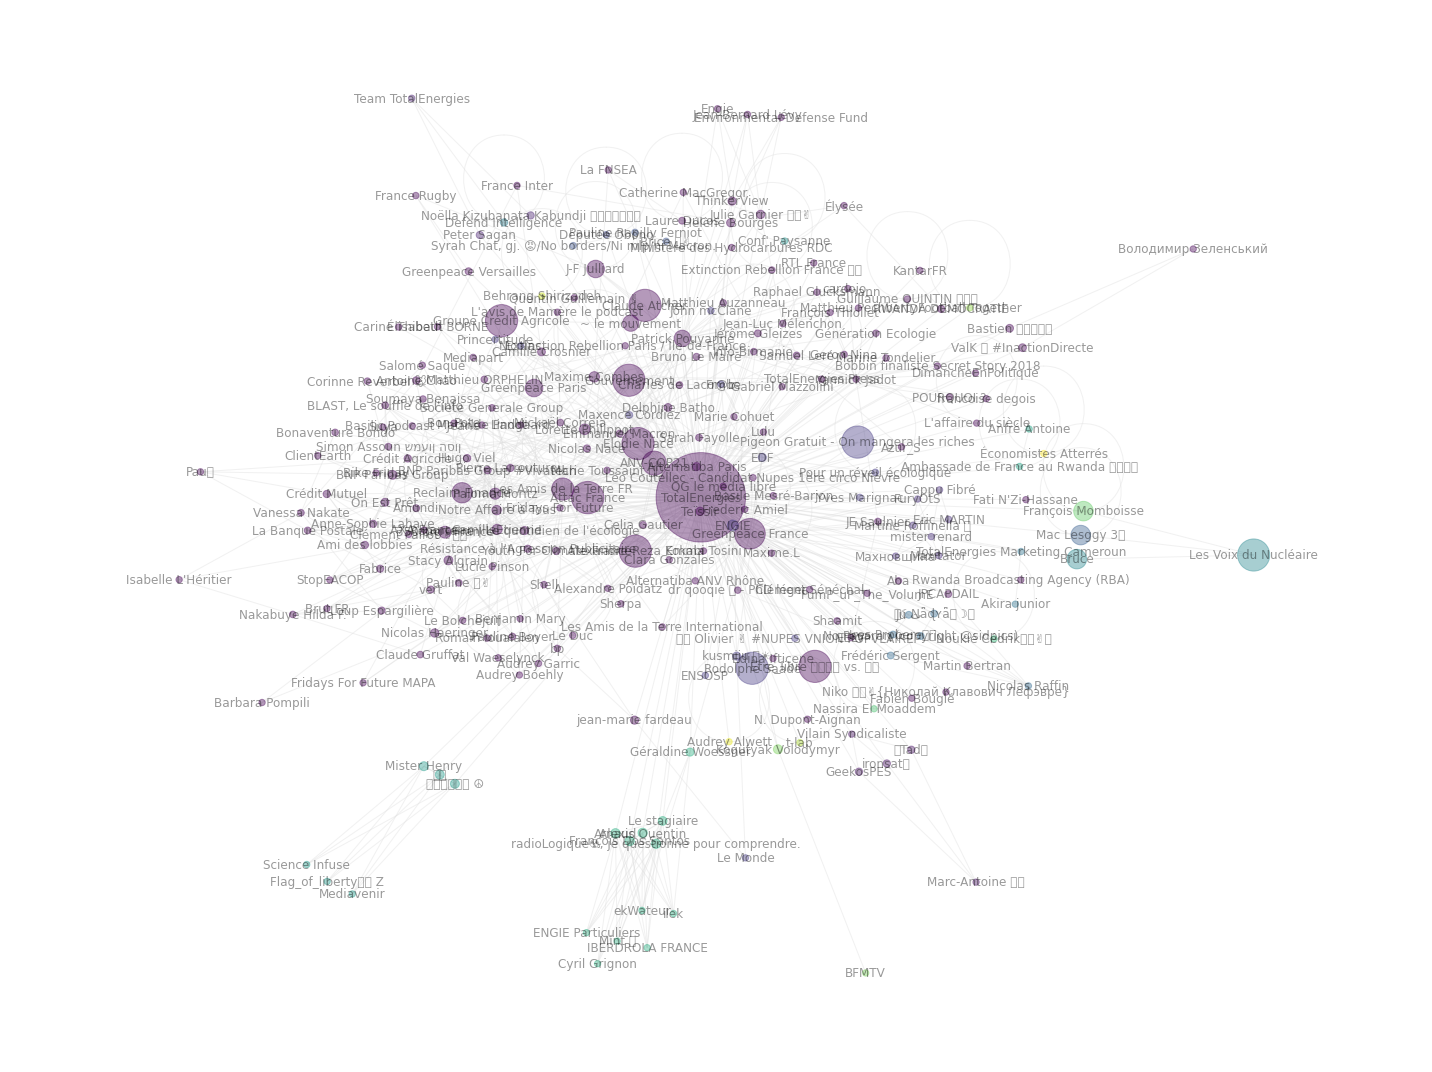

In [34]:
tweets.show_network(G)

In [51]:
nodes_data,edges_data = tweets.export_network_gephi(G)

Exported nodes.csv and edges.csv in folder '.'


# Analyse Total

In [35]:
tweets_total = tweets.query_user("TotalEnergies")
tweets_total

TweetsDataset(n_tweets=493)

In [36]:
tweets_total.data.head()

_type  \
8870   snscrape.modules.twitter.Tweet   
10064  snscrape.modules.twitter.Tweet   
11083  snscrape.modules.twitter.Tweet   
11346  snscrape.modules.twitter.Tweet   
11476  snscrape.modules.twitter.Tweet   

                                                     url  \
8870   https://twitter.com/TotalEnergies/status/15059...   
10064  https://twitter.com/TotalEnergies/status/15417...   
11083  https://twitter.com/TotalEnergies/status/15409...   
11346  https://twitter.com/TotalEnergies/status/15402...   
11476  https://twitter.com/TotalEnergies/status/15398...   

                           date  \
8870  2022-03-21 16:50:54+00:00   
10064 2022-06-28 12:57:30+00:00   
11083 2022-06-26 09:08:09+00:00   
11346 2022-06-24 08:03:03+00:00   
11476 2022-06-23 07:40:35+00:00   

                                                 content  \
8870   @amisdelaterre @AnvCop21 @alternatiba75 @green...   
10064  Thanks to our partnership with @joinstationf, ...   
11083  🗞️Ce matin, dans le @leJDD, les patrons de @To...   
11346  TotalEnergies is teaming up with Compagnie des...   
11476  @MarijkeFontene1 3/3 L’éolien offshore a un gr...   

                                         renderedContent                   id  \
8870   @amisdelaterre @AnvCop21 @alternatiba75 @green...  1505950087486263306   
10064  Thanks to our partnership with @joinstationf, ...  1541767749688508416   
11083  🗞️Ce matin, dans le @leJDD, les patrons de @To...  1540985254051291138   
11346  TotalEnergies is teaming up with Compagnie des...  1540244095519563776   
11476  @MarijkeFontene1 3/3 L’éolien offshore a un gr...  1539876056030650369   

                                                    user  replyCount  \
8870   {'_type': 'snscrape.modules.twitter.User', 'us...           8   
10064  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
11083  {'_type': 'snscrape.modules.twitter.User', 'us...          56   
11346  {'_type': 'snscrape.modules.twitter.User', 'us...           4   
11476  {'_type': 'snscrape.modules.twitter.User', 'us...           0   

       retweetCount  likeCount  quoteCount       conversationId lang  \
8870              0          3           1  1505823330263347204   fr   
10064             4         11           0  1541767749688508416   en   
11083             7         27          17  1540985254051291138   fr   
11346             1         13           2  1540244095519563776   en   
11476             0          0           0  1536729086550331393   fr   

                                                outlinks  \
8870                                                None   
10064                                               None   
11083  [https://www.lejdd.fr/Societe/tribune-nous-dev...   
11346  [https://totalenergies.com/media/news/press-re...   
11476                                               None   

                     tcooutlinks  \
8870                        None   
10064                       None   
11083  [https://t.co/7ivjuLZF9l]   
11346  [https://t.co/BMYdEg3l4R]   
11476                       None   

                                                   media retweetedTweet  \
8870                                                None           None   
10064  [{'_type': 'snscrape.modules.twitter.Video', '...           None   
11083                                               None           None   
11346                                               None           None   
11476                                               None           None   

      quotedTweet  inReplyToTweetId  \
8870         None      1.505823e+18   
10064        None               NaN   
11083        None               NaN   
11346        None               NaN   
11476        None      1.539876e+18   

                                           inReplyToUser  \
8870   {'_type': 'snscrape.modules.twitter.User', 'us...   
10064                                               None   
11083                                               Non

In [37]:
tweets_total.show(10)

>> From TotalEnergies - Likes 358 - Date 2022-03-23 13:27:02+00:00
(1/3) Monsieur @yjadot, les mots ont un sens et vos propos sont inacceptables. Être « complice de crimes de guerre » c'est fournir une aide directe à un Etat ou à une organisation criminelle auteurs des crimes. Vos accusations sont une insulte à l'intégrité de nos équipes... https://t.co/1Uw8Ms2ihS

------------------------------------------
>> From TotalEnergies - Likes 344 - Date 2022-05-25 14:56:17+00:00
1/5 From May 23 to 27, we will be taking part in the World Gas Conference #WGC22 in South Korea, a golden opportunity to drive home the major role that gas can play in moving the energy transition forward while networking with other industry professionals! 👇 https://t.co/dnbjIZbpfk

------------------------------------------
>> From TotalEnergies - Likes 247 - Date 2022-06-10 12:49:34+00:00
For the first time in the endurance event’s history, the 62 race cars competing in the 90th @24hoursoflemans will be supplied wi

In [38]:
tweets_total.show_evolution(period = "1W").show()
tweets_total.show_evolution(period = "1D").show()

In [39]:
tweets_total.show_lang()

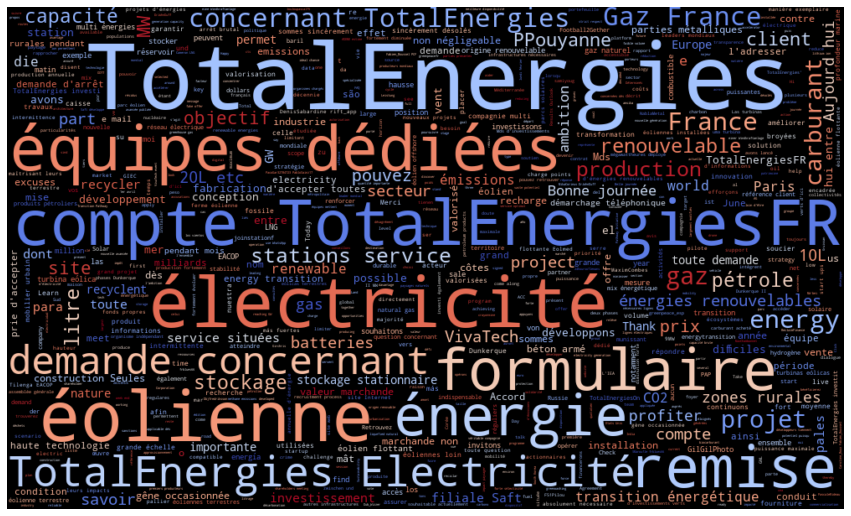

In [9]:
tweets_total.show_wordcloud()

In [124]:
tweets_total.show_hashtags()

In [129]:
tweets_total.query_hashtags(["EACOP"]).show(10)

>> From TotalEnergies - Likes 70 - Date 2022-05-21 09:08:46+00:00
1/9 - En réponse à votre vidéo @PalomaMoritz sur le projet #EACOP, nous souhaitons corriger plusieurs erreurs et contrevérités. Tous nos propos sont vérifiables facilement sur notre site web et auprès des tiers indépendants réalisant les études d'impact. https://t.co/y2yhQ3xTVY

------------------------------------------
>> From TotalEnergies - Likes 32 - Date 2022-05-21 09:08:49+00:00
5/9 - L'@IEA ou le GIEC ne disent pas "0 pétrole" en 2050 mais une production divisée par 4. Une diminution forte de la demande en pétrole est absolument nécessaire mais son arrêt brutal n'est ni possible ni souhaitable face à la demande. #EACOP s'inscrit dans cette démarche.

------------------------------------------
>> From TotalEnergies - Likes 18 - Date 2022-05-21 09:08:46+00:00
2/9 - Tout d'abord #EACOP ce n'est pas du tout 34 millions de t de CO2 par an. 
Les émissions de gaz à effet de serre (scopes 1&amp;2) générées par le projet 

In [132]:
tweets_total.data["likeCount"].sum()

5803

In [18]:
G = tweets_total.make_network(min_degree=1)

0it [00:00, ?it/s]

In [30]:
tweets_total.data["is_reply"] = tweets_total.data["inReplyToUser"].map(lambda x : x is not None)
tweets_total.data["reply_username"] = tweets_total.data["inReplyToUser"].map(lambda x : x["username"] if x is not None else np.nan)


In [34]:
tweets_total.query("reply_username=='GilGilPhoto'").show()

>> From TotalEnergies - Likes 0 - Date 2022-06-07 14:10:27+00:00
@GilGilPhoto 1/3 L’énergie solaire est intermittente par nature, l’électricité produite doit pouvoir être livrée lorsque nous en avons besoin, assurer son stockage lorsqu’elle est produite (quand le soleil brille) reste sans doute l’un des plus grands défis pour l’industrie des renouvelables.

------------------------------------------
>> From TotalEnergies - Likes 0 - Date 2022-03-16 08:19:22+00:00
@GilGilPhoto Pendant son fonctionnement, une éolienne tourne à différentes vitesses en fonction de la force plus ou moins importante du vent. En 1 an, elle produit autant d'électricité que si elle avait tourné 20 à 25% du temps à capacité maximale. C'est ce qu'on appelle le facteur de charge.

------------------------------------------
>> From TotalEnergies - Likes 0 - Date 2022-03-16 07:55:36+00:00
@GilGilPhoto 1/3 L’énergie éolienne est intermittente par nature, le stockage à grande échelle de l’électricité d’origine renouve

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer()

In [42]:
vectorizer.fit_transform(tweets_total.data["clean_text"])

<493x3218 sparse matrix of type '<class 'numpy.int64'>'
	with 14116 stored elements in Compressed Sparse Row format>

In [43]:
tweets_total.show_most_mentioned_users()

In [44]:
tweets_total.data["reply_username"].value_counts().head(10)

TotalEnergies     130
GilGilPhoto         4
samiyoug            3
Dbjfredriksson      3
MikaCorinus         3
DrJohnDuff          3
amisdelaterre       2
eirollam__          2
IlRata              2
El_Alef             2
Name: reply_username, dtype: int64

In [45]:
tweets_total.data["is_reply"].value_counts(normalize = True)

True     0.78499
False    0.21501
Name: is_reply, dtype: float64

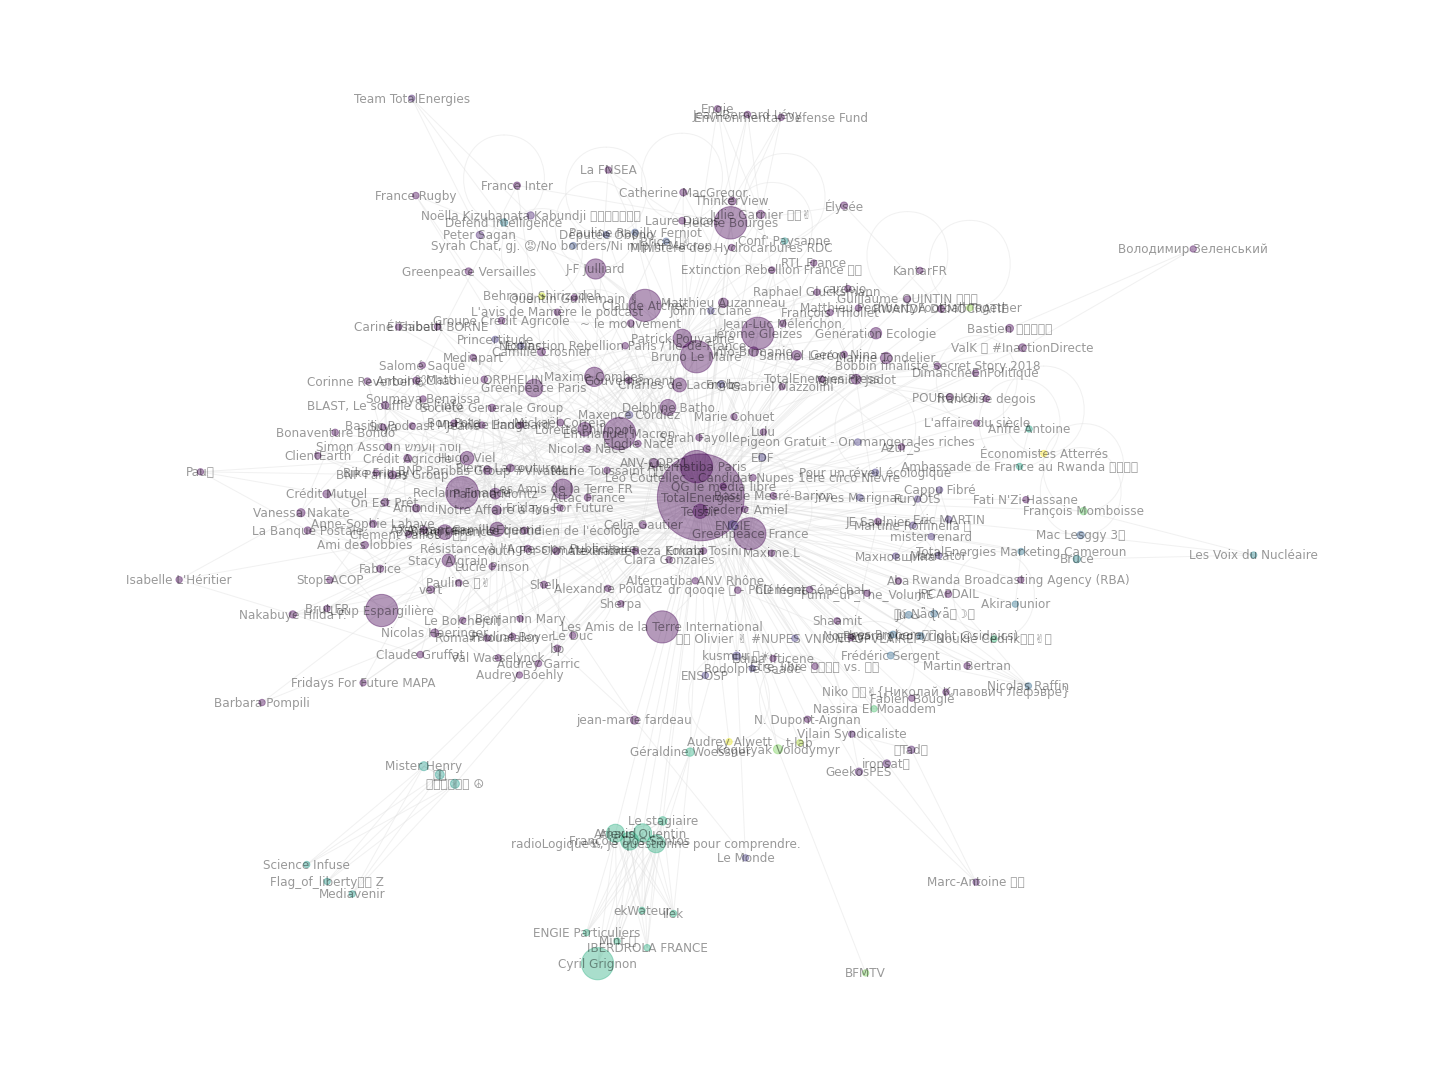

In [46]:
tweets_total.show_network(G)

In [ ]:
tweets_total.fit_topic_modeling()

... Create vectorizer model
... Create BERTopic model
... Fit BERTopic model


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from climatewatch.nlp.stopwords import stopwords

vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    stop_words = stopwords,
    
)

X = vectorizer.fit_transform(
    tweets_total.data["clean_text"],
)

X = pd.DataFrame(X.toarray(),columns = vectorizer.get_feature_names_out())

In [169]:
tsne = TSNE()
X_2D = tsne.fit_transform(X)
X_2D = pd.DataFrame(X_2D,columns = ["x","y"])
X_2D["cluster"] = clusters
X_2D["cluster"] = X_2D["cluster"].astype(str)
X_2D["clean_text"] = tweets_total.data["clean_text"].tolist()
X_2D["clean_text_wrapped"] = X_2D["clean_text"].map(lambda x : '<br>'.join(textwrap.wrap(x, width=50)))
X_2D["likeCount"] = tweets_total.data["likeCount"].tolist()

px.scatter(X_2D,x = "x",y = "y",color = "cluster",size = "likeCount",hover_data=["clean_text_wrapped"])

In [230]:
from sklearn.cluster import DBSCAN,KMeans,MeanShift

In [244]:
meanshift = MeanShift(bandwidth = 0.5)
dbscan = DBSCAN(eps = 0.5)
kmeans = KMeans(n_clusters=10)

In [249]:
X_explained["cluster"].value_counts()

-1    407
 6     17
 2     13
 1     10
 3      9
 7      7
 0      6
 8      6
 4      5
 5      5
Name: cluster, dtype: int64

In [142]:
y = (X_explained.groupby("cluster").mean()
     .melt(ignore_index = False).reset_index()
)

y["rank"] = y.groupby("cluster")["value"].rank(method = "dense",ascending = False)

top_words = 10
y = y.query(f"rank < {top_words}")

y.head()

cluster  variable     value  rank
2          2        10  0.127450   7.0
22         2  10 litre  0.122789   8.0
31         1       100  0.024267   9.0
234        4      2030  0.050512   3.0
440        0        90  0.090397   6.0

In [143]:
y_cluster = y.query("cluster==0")

In [144]:
y_cluster

cluster              variable     value  rank
440         0                    90  0.090397   6.0
450         0                 90 95  0.094429   5.0
460         0                    95  0.089210   7.0
470         0           95 éolienne  0.095968   4.0
940         0                  armé  0.089124   8.0
950         0         armé valorisé  0.089124   8.0
1380        0                 béton  0.087505   9.0
1390        0            béton armé  0.089124   8.0
1950        0   construction seules  0.089124   8.0
2300        0              diﬃciles  0.097630   3.0
2310        0     diﬃciles recycler  0.097630   3.0
2850        0              entre 90  0.094429   5.0
3910        0             hui entre  0.087505   9.0
4880        0             marchande  0.089124   8.0
4890        0         marchande non  0.089124   8.0
5370        0                   mât  0.089124   8.0
5380        0            mât valeur  0.089124   8.0
5420        0           métalliques  0.089124   8.0
5430        0       métalliques mât  0.089124   8.0
5540        0                   non  0.087505   9.0
5550        0       non négligeable  0.089124   8.0
5670        0           négligeable  0.089124   8.0
5680        0     négligeable béton  0.089124   8.0
5990        0                 pales  0.094429   5.0
6000        0       pales éoliennes  0.097630   3.0
6180        0   parties métalliques  0.089124   8.0
7240        0             recyclent  0.095968   4.0
7250        0     recyclent parties  0.089124   8.0
7260        0              recycler  0.094429   5.0
7720        0  secteur construction  0.089124   8.0
7810        0                seules  0.097630   3.0
7820        0          seules pales  0.097630   3.0
9120        0      valeur marchande  0.089124   8.0
9140        0              valorisé  0.089124   8.0
9150        0      valorisé secteur  0.089124   8.0
9800        0              éolienne  0.101029   2.0
9830        0    éolienne recyclent  0.095968   4.0
9850        0             éoliennes  0.167551   1.0
9860        0    éoliennes diﬃciles  0.097630   3.0

In [145]:
for i in range(10):
    y_cluster = y.query(f"cluster=={i}")
    fig = px.bar(y_cluster,x = "value",y = "variable",height = 300,width = 400,orientation = "h")
    fig.show()

In [180]:
X_2D["date"] = tweets_total.data["date"].tolist()
X_2D["count"] = 1

In [204]:
count = (X_2D
    .set_index("date")
    .groupby([pd.Grouper(freq = "1D"),"cluster"])
    ["count"].sum()
    .reset_index()
)

fig = px.line(
    count,x = "date",y = "count",color = "cluster",
    height = 400,
)
fig

In [205]:
fig = px.area(
    count,x = "date",y = "count",color = "cluster",
    height = 300,
)
fig.show()

fig = px.area(
    count,x = "date",y = "count",color = "cluster",
    groupnorm = "percent",
    height = 300,
)
fig.show()

In [201]:
y_cluster.sort_values

cluster                variable     value  rank
234         4                    2030  0.050512   3.0
3494        4                     gaz  0.044153   5.0
7074        4                 pétrole  0.036105   9.0
7414        4           renouvelables  0.059311   2.0
8644        4           totalenergies  0.036708   8.0
8844        4              transition  0.043949   6.0
9714        4                énergies  0.065237   1.0
9744        4  énergies renouvelables  0.037967   7.0
9754        4             énergétique  0.044239   4.0

In [197]:
y_cluster = y.query(f"cluster==4")
fig = px.bar(y_cluster,x = "value",y = "variable",height = 300,width = 400,orientation = "h")
fig.show()

In [206]:
tweets_total.query_date("2022-03-15").show()

>> From TotalEnergies - Likes 1 - Date 2022-03-15 13:13:39+00:00
@JeromeRider Merci pour votre question ! Être la compagnie des énergies responsables, c’est notamment devenir un acteur majeur de la production massive d’hydrogène propre. TotalEnergies a vocation à devenir un producteur d’hydrogène décarbonée à grande échelle.

------------------------------------------
>> From TotalEnergies - Likes 0 - Date 2022-03-15 15:25:38+00:00
@IpIRENE (2/2) s’intègrent dans le paysage, comme d’autres infrastructures nécessaires (lignes électriques…). Les organismes chargés de la protection du patrimoine, de la nature et/ou de l’architecture sont consultés en amont de la demande d’autorisation par les porteurs de projets.

------------------------------------------
>> From TotalEnergies - Likes 0 - Date 2022-03-15 14:31:52+00:00
@AlgerienFais TotalEnergies n’est pas un fabricant d’éoliennes, mais en achète notamment aux constructeurs européens. Une éolienne terrestre coûte aujourd’hui sur le march